In [3]:
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
import pandas as pd

df = pd.read_csv('Hotel_Unique_Complete.csv')

In [5]:
df = pd.read_csv('Hotel_Unique_Complete.csv')
df = df.fillna(0)
numeric_DF = df._get_numeric_data()
x = numeric_DF.values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scaler.fit_transform(x)
numeric_DF = pd.DataFrame(x_scaled,columns = numeric_DF.columns)

In [6]:
#Splitting dataset into testing and training
X,y = numeric_DF.iloc[:,:-1].values, numeric_DF["Overall_Label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0,stratify=y)

In [7]:
#Testing kNN classifiers with Euclidean distance, k=5
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

   KNN  Score for Training  Score for Testing
1  1.0            1.000000           0.929125
2  2.0            0.974679           0.906634
3  3.0            0.954385           0.948403
4  4.0            0.953919           0.946513
AxesSubplot(0.125,0.125;0.775x0.755)


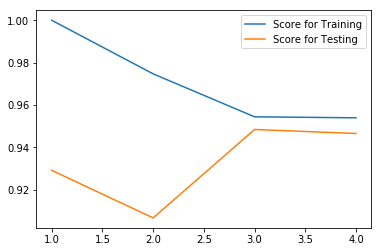

In [32]:
#Testing KNN classifiers with different k values 
resultsKNN_1 = pd.DataFrame(columns=['KNN','Score for Training','Score for Testing'])
for knnCount in range(1,5):
    knn = KNeighborsClassifier(n_neighbors=knnCount, p=2, metric = 'minkowski')
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    scoreTrain = knn.score(X_train, y_train)
    scoreTest = knn.score(X_test, y_test)
    resultsKNN_1.loc[knnCount]=[knnCount,scoreTrain,scoreTest]
    
print (resultsKNN_1)
resultsKNN_1.pop('KNN')
ax_KNN_1 = resultsKNN_1.plot()
print(ax_KNN_1)

In [33]:
#Deriving confusion matrix and F1 score
from sklearn.metrics import confusion_matrix, classification_report
knn=KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski',weights='distance')
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
scoreTrain=knn.score(X_train,y_train)
print('\n','Mean Accuracy on Training Samples:',scoreTrain)
scoreTest=knn.score(X_test,y_test)
print('\n','Mean Accuracy on Testing Samples:',scoreTest)
print(classification_report(y_test,knn_pred))
print(confusion_matrix(y_test,knn_pred))


 Mean Accuracy on Training Samples: 1.0

 Mean Accuracy on Testing Samples: 0.9484029484029484
             precision    recall  f1-score   support

        0.0       0.36      0.04      0.07       265
        1.0       0.95      1.00      0.97      5026

avg / total       0.92      0.95      0.93      5291

[[  10  255]
 [  18 5008]]


AxesSubplot(0.125,0.125;0.62x0.755)


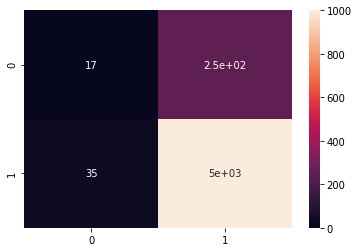

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predicted = knn.predict(X_test)
cm = pd.DataFrame(confusion_matrix(y_test, predicted))
ax = sns.heatmap(cm, annot=True,vmax=0,vmin=1000)
print (ax)

In [31]:
print(confusion_matrix(y_test, knn_pred))

[[  10  255]
 [  18 5008]]
